In [1]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
from State import State


In [2]:
env = State()
env.create_state([-1,0,0])

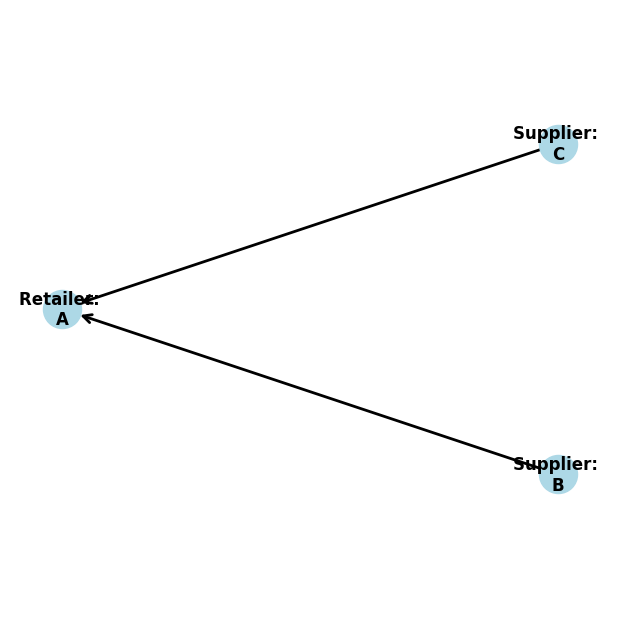

In [3]:
env.show_network()

In [4]:
env.observation_space.sample()

array([ 69,  71, 189,  22], dtype=int64)

In [113]:
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        #env.render()
        action = env.action_space.sample()
        print(type(action))
        print("action" + str(action))
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

c:\Users\darry\OneDrive\Desktop\NUS\Astar\Forecasters\RLsrc\Demandable.py:324: RuntimeWarning: invalid value encountered in double_scalars
  return total * self.holding_cost


<class 'numpy.ndarray'>
action[114  56]
time 0: 
A
inv level: {Item(340): 38.0, Item(325): 38.0}
inv pos: {Item(340): 152.0, Item(325): 94.0}
orders: [1.0, Item(340), 114][2.0, Item(325), 56]
total cost: 152.0
holding cost: 152.0
backorder unit: 0.0 backorder cost: 0.0
inv map: {Item(340): Supplier(B), Item(325): Supplier(C)}
unit sold: 27.0 price sold: 270.53999999999996
B
inv level: {Item(340): inf}
inv pos: {Item(340): inf}
C
inv level: {Item(325): inf}
inv pos: {Item(325): inf}
[152.  38.  94.  38.]
<class 'numpy.ndarray'>
action[ 14 130]
time 1: 
A
inv level: {Item(340): 118.0, Item(325): 4.0}
inv pos: {Item(340): 132.0, Item(325): 190.0}
orders: [2.0, Item(325), 56][2.0, Item(340), 14][3.0, Item(325), 130]
total cost: 244.0
holding cost: 244.0
backorder unit: 0.0 backorder cost: 0.0
inv map: {Item(340): Supplier(B), Item(325): Supplier(C)}
unit sold: 34.0 price sold: 340.68
B
inv level: {Item(340): inf}
inv pos: {Item(340): inf}
C
inv level: {Item(325): inf}
inv pos: {Item(325): 

In [101]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

from rl.agents import DDPGAgent

In [114]:
def build_model(states, actions):
    model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(64, activation='relu', input_shape=(1, 4)),
    tensorflow.keras.layers.Dense(64, activation='relu'),
    #tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(2, activation='softmax')
])
    return model

In [115]:
states = env.observation_space.shape
actions = env.action_space
states
actions

MultiDiscrete([150 150])

In [116]:
env.action_space.shape

(2,)

In [117]:
model = build_model(states, actions)


TypeError: Error converting shape to a TensorShape: Dimension value must be integer or None or have an __index__ method, got value '(4,)' with type '<class 'tuple'>'.

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                320       
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 2)                 130       
                                                                 
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [ ]:
def build_agent2(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    ddpg = DDPGAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return ddpg

In [ ]:
dqn = build_agent(model, 2)
#dqn.compile(optimizer=Adam(learning_rate=1e-3), metrics=['mae'])
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.compute_q_values()
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

C:\Users\darry\AppData\Roaming\Python\Python311\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 50000 steps ...
Interval 1 (0 steps performed)


c:\Users\darry\OneDrive\Desktop\NUS\Astar\Forecasters\RLsrc\Demandable.py:324: RuntimeWarning: invalid value encountered in double_scalars
  return total * self.holding_cost


ValueError: Error when checking input: expected dense_36_input to have 2 dimensions, but got array with shape (1, 1, 4)

In [ ]:
scores = dqn.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))